# PROBLEM SET3 - JESSE BAUTISTA

Question 1
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [6]:
# Step 1. Import the necessary libraries
import numpy as np #np is the standard convention for Numpy
import pandas as pd

#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
users_indexed = users.set_index('user_id')
users_indexed

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [22]:
#Step 4. Discover what is the mean age per occupation
users_indexed.groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [42]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
#users_indexed.groupby(['occupation','gender']).count()
ratio = users_indexed.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
# calculate ratios(axis=1)(axis=1)(axis=1)
sums = ratio[['F', 'M']].sum(axis=1)
ratio['MaleRatio'] = ((ratio['M'] / sums) * 100)
ratio.sort_values(by=['MaleRatio'], inplace=True, ascending=False)
print(ratio)

gender          F    M   MaleRatio
occupation                        
doctor          0    7  100.000000
engineer        2   65   97.014925
technician      1   26   96.296296
retired         1   13   92.857143
programmer      6   60   90.909091
executive       3   29   90.625000
scientist       3   28   90.322581
entertainment   2   16   88.888889
lawyer          2   10   83.333333
salesman        3    9   75.000000
educator       26   69   72.631579
student        60  136   69.387755
other          36   69   65.714286
marketing      10   16   61.538462
writer         19   26   57.777778
none            4    5   55.555556
administrator  36   43   54.430380
artist         13   15   53.571429
librarian      29   22   43.137255
healthcare     11    5   31.250000
homemaker       6    1   14.285714


In [63]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users_indexed.groupby('occupation').agg({"age": "max"})

,age
occupation,
administrator,70
artist,48
doctor,64
educator,63
engineer,70
entertainment,50
executive,69
healthcare,62
homemaker,50


In [64]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users_indexed.groupby('occupation').agg({"age": "min"})

,age
occupation,
administrator,21
artist,19
doctor,28
educator,23
engineer,22
entertainment,15
executive,22
healthcare,22
homemaker,20


In [70]:
#Step 7. For each combination of occupation and sex, calculate the mean age
users_indexed.groupby(['occupation','gender']).mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [74]:
#Step 8. For each occupation present the percentage of women and men
ratio = users_indexed.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
# calculate ratios
sums = ratio[['F', 'M']].sum(axis=1)
ratio['MalePercentage'] = ((ratio['M'] / sums) * 100)
ratio['FemalePercentage'] = ((ratio['F'] / sums) * 100)
print(ratio)

gender          F    M  MalePercentage  FemalePercentage
occupation                                              
administrator  36   43       54.430380         45.569620
artist         13   15       53.571429         46.428571
doctor          0    7      100.000000          0.000000
educator       26   69       72.631579         27.368421
engineer        2   65       97.014925          2.985075
entertainment   2   16       88.888889         11.111111
executive       3   29       90.625000          9.375000
healthcare     11    5       31.250000         68.750000
homemaker       6    1       14.285714         85.714286
lawyer          2   10       83.333333         16.666667
librarian      29   22       43.137255         56.862745
marketing      10   16       61.538462         38.461538
none            4    5       55.555556         44.444444
other          36   69       65.714286         34.285714
programmer      6   60       90.909091          9.090909
retired         1   13       92

Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [77]:
#Step 1. Import the necessary libraries - DONE FROM item #1
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12_indexed = euro12.set_index('Team')
euro12_indexed.head()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [78]:
#Step 4. Select only the Goal column
print(euro12_indexed.Goals)

Team
Croatia                 4
Czech Republic          4
Denmark                 4
England                 5
France                  3
Germany                10
Greece                  5
Italy                   6
Netherlands             2
Poland                  2
Portugal                6
Republic of Ireland     1
Russia                  5
Spain                  12
Sweden                  5
Ukraine                 2
Name: Goals, dtype: int64


In [83]:
#Step 5. How many team participated in the Euro2012?
print("Number of Teams: ", len(euro12_indexed))

Number of Teams:  16


In [85]:
#Step 6. What is the number of columns in the dataset?
print("Number of Columns: ", len(euro12_indexed.columns))

Number of Columns:  34


In [86]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12_indexed.filter(['Team', 'Yellow Cards', 'Red Cards'], axis=1)
discipline

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0
Germany,4,0
Greece,9,1
Italy,16,0
Netherlands,5,0


In [91]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=['Red Cards','Yellow Cards'],inplace=True)
discipline

,Yellow Cards,Red Cards
Team,,
Denmark,4,0
Germany,4,0
England,5,0
Netherlands,5,0
Ukraine,5,0
France,6,0
Russia,6,0
Czech Republic,7,0
Sweden,7,0


In [92]:
#Step 9. Calculate the mean Yellow Cards given per Team - the average is the actual value since there is only 
# one occurence of each Team in the dataset 
discipline2 = euro12_indexed.filter(['Team', 'Yellow Cards'], axis=1)
discipline2

,Yellow Cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


In [94]:
#Step 10. Filter teams that scored more than 6 goals
euro12_indexed.loc[euro12_indexed['Goals'] > 6]

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,...,15,93.8%,102,83,19,11,0,17,17,18


In [110]:
#Step 11. Select the teams that start with G
#euro12G = euro12_indexed[euro12_indexed["Team"].str.startswith("G")]
#euro12_indexed
euro12['Team_starts_with_G'] = list(map(lambda x: x.startswith('G'), euro12['Team'])) 
euro12.loc[euro12['Team_starts_with_G'] == True]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,Team_starts_with_G
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,62.6%,63,49,12,4,0,15,15,17,True
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,65.1%,67,48,12,9,1,12,12,20,True


In [111]:
#Step 12. Select the first 7 columns
euro12_indexed.iloc[:,:7]

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork
Team,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0
Czech Republic,4,13,18,41.9%,12.9%,39,0
Denmark,4,10,10,50.0%,20.0%,27,1
England,5,11,18,50.0%,17.2%,40,0
France,3,22,24,37.9%,6.5%,65,1
Germany,10,32,32,47.8%,15.6%,80,2
Greece,5,8,18,30.7%,19.2%,32,1
Italy,6,34,45,43.0%,7.5%,110,2
Netherlands,2,12,36,25.0%,4.1%,60,2


In [113]:
#Step 13. Select all columns except the last 3
euro12_indexed.iloc[:,:-3]

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,0,10,3,13,81.3%,41,62,2,9,0
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,1,10,5,10,66.7%,25,38,8,4,0
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,2,29,3,22,88.1%,43,45,6,5,0
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,1,11,6,10,62.6%,63,49,12,4,0
Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,...,1,23,7,13,65.1%,67,48,12,9,1
Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,...,2,18,7,20,74.1%,101,89,16,16,0
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,...,0,9,5,12,70.6%,35,30,3,5,0


In [128]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
#euro12_indexed
options = ['England', 'Italy', 'Russia']
euro12_3 = euro12[euro12['Team'].isin(options)]
print(euro12_3[['Team','Shooting Accuracy']])

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3
Housing
Step 1. Import the necessary libraries
Step 2.Create 3 differents Series, each of length 100, as follows:
    The first a random number from 1 to 4
    The second a random number from 1 to 3
    The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true? 
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [141]:
#Step 1. Import the necessary libraries - DONE IN ITEM #1
#Step 2.Create 3 differents Series, each of length 100, as follows:
#    The first a random number from 1 to 4
#    The second a random number from 1 to 3
#    The third a random number from 10,000 to 30,000
x = np.random.randint(1,5,100)
p_series1 = pd.Series(x)
p_series1

0     1
1     4
2     4
3     4
4     2
     ..
95    4
96    4
97    4
98    2
99    3
Length: 100, dtype: int64

In [142]:
y = np.random.randint(1,4,100)
p_series2 = pd.Series(y)
p_series2

0     1
1     1
2     1
3     3
4     2
     ..
95    2
96    2
97    3
98    3
99    2
Length: 100, dtype: int64

In [143]:
z = np.random.randint(10000,30000,100)
p_series3 = pd.Series(z)
p_series3

0     29563
1     11682
2     21444
3     21574
4     15734
      ...  
95    10267
96    22454
97    19050
98    16763
99    13389
Length: 100, dtype: int64

In [164]:
#Step 3. Create a DataFrame by joinning the Series by column
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
housing = pd.DataFrame(columns = ['bedrs', 'bathrs', 'price_sqr_meter'])
housing['bedrs'] = p_series1
housing['bathrs'] = p_series2
housing['price_sqr_meter'] = p_series3
housing

,bedrs,bathrs,price_sqr_meter
0,1,1,29563
1,4,1,11682
2,4,1,21444
3,4,3,21574
4,2,2,15734
...,...,...,...
95,4,2,10267
96,4,2,22454
97,4,3,19050
98,2,3,16763


In [150]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# What do you mean dataframe with values of 3 series in one column? 3 values in 1 column? I just added the 3 series for the bigcolumn column
# I am not sure what the step 5 question is
onecolumn_df = pd.DataFrame(columns =['bigcolumn'])
onecolumn_df['bigcolumn'] = p_series1+p_series2+p_series3
onecolumn_df

,bigcolumn
0,29565
1,11687
2,21449
3,21581
4,15738
...,...
95,10273
96,22460
97,19057
98,16768


In [151]:
#Step 6. Ops it seems it is going only until index 99. Is it true? 
#It is true because it has 100 items but it started at index 0 so index is only until 99

In [165]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
r = np.linspace(0,299,100,dtype = int)
p_series4 = pd.Series(r)
p_series4

0       0
1       3
2       6
3       9
4      12
     ... 
95    286
96    289
97    292
98    295
99    299
Length: 100, dtype: int64

In [166]:
housing['reindex'] = p_series4
housing = housing.set_index('reindex')
housing

,bedrs,bathrs,price_sqr_meter
reindex,,,
0,1,1,29563
3,4,1,11682
6,4,1,21444
9,4,3,21574
12,2,2,15734
...,...,...,...
286,4,2,10267
289,4,2,22454
292,4,3,19050


Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
YrMoDy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [169]:
#Step 1. Import the necessary libraries - DONE FROM ITEM#1
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv(r'wind.txt',parse_dates={"date": ["Yr","Mo","Dy"]},delimiter="\s+")
data

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [175]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
data['date']=data['date'].apply(lambda x:x.replace(year=x.year-100) if x.year > 2022 else x)
data

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [176]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data = data.set_index('date')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [180]:
data.index.inferred_type == "datetime64"

True

In [184]:
#Step 6. Compute how many values are missing for each location over the entire record.
#They should be ignored in all calculations below.
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [188]:
#Step 7. Compute how many non-missing values there are in total.
#PER LOCATION
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [189]:
#TOTAL FOR ENTIRE DATAFRAME
data.notnull().sum().sum()

78857

In [191]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#A single number for the entire dataset.
data.mean().mean()

10.227982360836924

In [199]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
#A different set of numbers for each location.
loc_stats = data.aggregate(['min','max','mean','std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [213]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.
day_stats = data.aggregate(['min','max','mean','std'],axis=1)
day_stats

,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [240]:
#Step 11. Find the average windspeed in January for each location.
#Treat January 1961 and January 1962 both as January.
orig = pd.read_csv(r'wind.txt',parse_dates={"date": ["Yr","Mo","Dy"]},delimiter="\s+")
jan_temp = orig.groupby([(orig.date.dt.month)]).mean()
jan_temp.iloc[0:1]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1,14.847325,12.91456,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.55052,18.028763


In [261]:
# Step 12. Downsample the record to a yearly frequency for each location.
yearly = data.reset_index()
yr_display = yearly.groupby([(yearly.date.dt.year)]).mean()
yr_display

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [274]:
# Step 13. Downsample the record to a monthly frequency for each location.
monthly = data.reset_index()
mo_display = monthly.groupby([(yearly.date.dt.year),(monthly.date.dt.month)]).mean()
mo_display

RPT        VAL        ROS       KIL        SHA        BIR  \
date date                                                                    
1961 1     14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
     2     16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
     3     10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
     4     10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
     5      9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...              ...        ...        ...       ...        ...        ...   
1978 8      9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
     9     10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
     10     9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
     11    16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
     12    16.175484  13.748065  15.635161  7.094839  11.398710   9.241613   

                 DUB        CLA        MUL        CLO        BEL        MAL  
date date                                                                    
1961 1     11.184839   9.245333   9.085806  10.107419  13.880968  14.703226  
     2     11.890714  11.846071  11.821429  12.714286  18.583214  15.411786  
     3      9.644194   9.829677  10.294138  11.251935  16.410968  15.720000  
     4      6.925333   7.094667   7.342333   7.237000  11.147333  10.278333  
     5      7.604000   8.177097   8.039355   8.499355  11.900323  12.011613  
...              ...        ...        ...        ...        ...        ...  
1978 8      5.650323   5.417742   7.241290   5.536774  10.466774  12.054194  
     9     10.790333   9.583000  10.069333   8.939000  15.680333  19.391333  
     10     8.115484   7.337742   8.297742   8.243871  13.776774  17.150000  
     11    11.492333   9.657333  10.701333  10.676000  17.404667  20.723000  
     12    12.077419  10.194839  10.616774  11.028710  13.859677  21.371613  

[216 rows x 12 columns]

In [264]:
# Step 14. Downsample the record to a weekly frequency for each location.
weekly = data.reset_index()
wk_display = monthly.groupby([(monthly.date.dt.year),(monthly.date.dt.month),(weekly.date.dt.isocalendar().week)]).mean()
wk_display

RPT        VAL        ROS        KIL        SHA  \
date date week                                                          
1961 1    1     13.541429  11.486667  10.487143   6.417143   9.474286   
          2     12.468571   8.967143  11.958571   4.630000   7.351429   
          3     13.204286   9.862857  12.982857   6.328571   8.966667   
          4     19.880000  16.141429  18.225714  12.720000  17.432857   
          5     18.210000  15.485000  13.815000   9.940000  13.750000   
...                   ...        ...        ...        ...        ...   
1978 12   48    18.733333  16.780000  18.693333   9.833333  14.723333   
          49    20.740000  19.190000  17.034286   9.777143  15.287143   
          50    16.758571  14.692857  14.987143   6.917143  11.397143   
          51    11.155714   8.008571  13.172857   4.004286   7.825714   
          52    14.951429  11.801429  16.035714   6.507143   9.660000   

                      BIR        DUB        CLA        MUL        CLO  \
date date week                                                          
1961 1    1      6.435714  11.061429   6.616667   8.434286   8.497143   
          2      5.072857   7.535714   6.820000   5.712857   7.571429   
          3      7.417143   9.257143   7.875714   7.145714   8.124286   
          4     14.828571  15.528571  15.160000  14.480000  15.640000   
          5     10.040000  14.690000   9.210000  10.210000  10.960000   
...                   ...        ...        ...        ...        ...   
1978 12   48    13.930000  17.110000  12.946667  13.903333  15.513333   
          49    12.774286  14.437143  12.488571  13.870000  14.082857   
          50     7.272857  10.208571   7.967143   9.168571   8.565714   
          51     6.290000   7.798571   8.667143   7.151429   8.072857   
          52     8.620000  13.708571  10.477143  10.868571  11.471429   

                      BEL        MAL  
date date week                        
1961 1    1     12.481429  13.238571  
          2     11.125714  11.024286  
          3      9.821429  11.434286  
          4     20.930000  22.530000  
          5     15.650000  16.585000  
...                   ...        ...  
1978 12   48    16.253333  23.800000  
          49    18.517143  23.061429  
          50    11.102857  15.562857  
          51    11.845714  18.977143  
          52    12.947143  26.844286  

[1124 rows x 12 columns]

In [268]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across 
#all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly = data.reset_index()
wk_display = monthly.groupby([(monthly.date.dt.year),(monthly.date.dt.month),(weekly.date.dt.isocalendar().week)]).mean()
wk_display2 = wk_display.aggregate(['min','max','mean','std'],axis=1)
wk_display2


min        max       mean       std
date date week                                           
1961 1    1      6.417143  13.541429   9.847659  2.601705
          2      4.630000  12.468571   8.353214  2.719649
          3      6.328571  13.204286   9.368413  2.224531
          4     12.720000  22.530000  16.958095  2.915635
          5      9.210000  18.210000  13.212083  3.032732
...                   ...        ...        ...       ...
1978 12   48     9.833333  23.800000  16.018333  3.507966
          49     9.777143  23.061429  15.938333  3.843412
          50     6.917143  16.758571  11.216786  3.474393
          51     4.004286  18.977143   9.414167  3.909628
          52     6.507143  26.844286  12.824405  5.152236

[1124 rows x 4 columns]

Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column? 
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset? 
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [321]:
#Step 1. Import the necessary libraries - DONE in ITEM#1
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',delimiter="\t")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [277]:
# Step 4. See the first 10 entries
chipo.iloc[0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [282]:
#Step 5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [284]:
#Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [285]:
#Step 7. Print the name of all the columns.
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [287]:
#Step 8. How is the dataset indexed?
# It is indexed using the default 0 based indexing when importing file with panda. 
# Below is example of index location command
chipo.iloc[0:5]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [291]:
# Step 9. Which was the most-ordered item?
chipo['item_name'].mode()

'Chicken Bowl'

In [296]:
#Step 10. For the most-ordered item, how many items were ordered?
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [297]:
# Step 11. What was the most ordered item in the choice_description column? 
chipo['choice_description'].mode()

0    [Diet Coke]
dtype: object

In [299]:
# Step 12. How many items were orderd in total?
chipo['quantity'].sum()

4972

In [307]:
# Step 13.
#• Turn the item price into a float - ERROR because can't convert string with $ character to float
chipo['item_price'] = chipo['item_price'].astype(float)

ValueError: could not convert string to float: '$2.39 '

In [308]:
#• Check the item_price type
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [322]:
# • Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].map(lambda x:x.lstrip('$'))

In [326]:
# • Check the item price type
chipo['item_price'] = chipo['item_price'].astype('float')
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [328]:
#Step 14. How much was the revenue for the period in the dataset? 
#Step 17. How many different items are sold?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo['revenue'].sum()

39237.02

In [341]:
#Step 15. How many orders were made in the period?
chipo['order_id'].nunique()

1834

In [353]:
#Step 16. What is the average revenue amount per order
avg_rev = chipo.groupby(['order_id']).sum()
avg_rev_disp = avg_rev['revenue'].mean() 
avg_rev_disp

21.394231188658654

In [342]:
#Step 17. How many different items are sold?
chipo['item_name'].nunique()

50

Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

<AxesSubplot:title={'center':'Number of Marriages and Divorces Per Capita in the US from 1867 to 2014'}, xlabel='Year', ylabel='Number of Marriages and Divorces per Capita'>

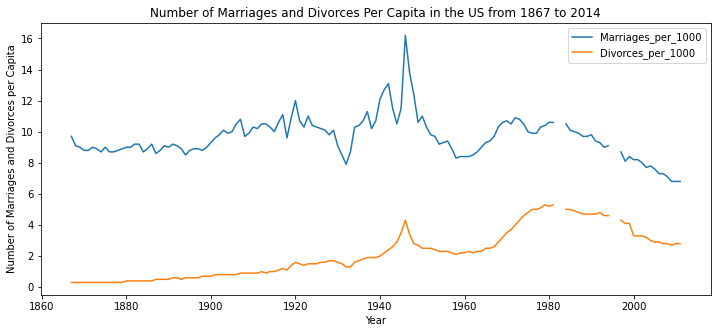

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mar_div = pd.read_csv('us-marriages-divorces-1867-2014.csv')

mar_div.plot(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], kind="line",title="Number of Marriages and Divorces Per Capita in the US from 1867 to 2014", ylabel = "Number of Marriages and Divorces per Capita",figsize=(12, 5))

Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

<AxesSubplot:title={'center':'Number of Marriages and Divorces Per Capita in the US between 1900, 1950 and 2000'}, xlabel='Year', ylabel='Number of Marriages and Divorces per Capita'>

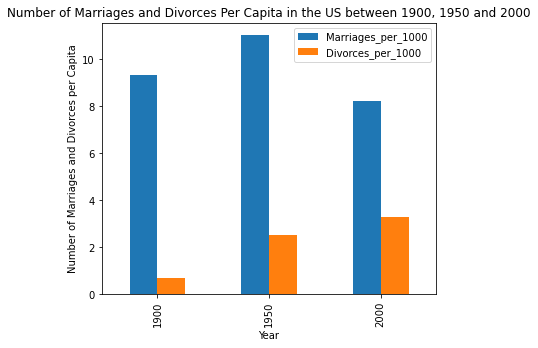

In [49]:
disp = mar_div[(mar_div['Year'].isin([1900, 1950, 2000]))]
disp.plot(x="Year" , y=["Marriages_per_1000", "Divorces_per_1000"], ylabel = "Number of Marriages and Divorces per Capita", kind="bar", title="Number of Marriages and Divorces Per Capita in the US between 1900, 1950 and 2000", figsize=(6, 5))


Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

<AxesSubplot:title={'center':'Deadliest Actors in Hollywod by Kill Count'}, ylabel='Actor Name'>

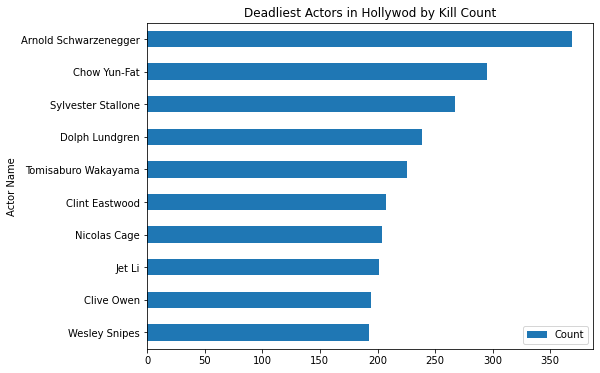

In [88]:
ded_actors = pd.read_csv('actor_kill_counts.csv')
ded_actors = ded_actors.sort_values('Count')
ded_actors.plot(x="Actor", y="Count", kind="barh",title="Deadliest Actors in Hollywod by Kill Count",xlabel='Actor Name',ylabel='Number of Kills',figsize=(8, 6))

Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

<AxesSubplot:title={'center':'Cause of Death of all Roman Emperors in Percentage'}>

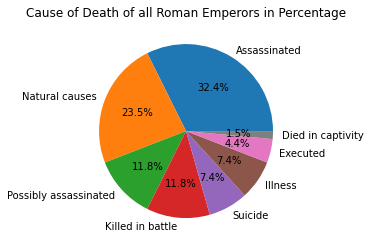

In [80]:
roman_emp = pd.read_csv('roman-emperor-reigns.csv')
roman_emp['Cause_of_Death'].value_counts().plot(kind='pie',title='Cause of Death of all Roman Emperors in Percentage',autopct='%1.1f%%',ylabel='')


Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

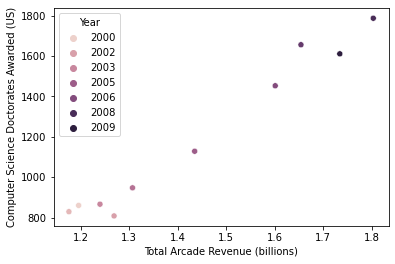

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
arc_comp_sci = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
sns.scatterplot(data=arc_comp_sci, x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year')